<a href="https://colab.research.google.com/github/ariesslin/ie7500-g1-tweet-sentiment-nlp/blob/main/scripts/3.%20Model_Development.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div style="background-color:#e6f2ff; border-left:8px solid #0059b3; padding:20px; margin:20px 0;">
  <h2 style="color:#003366;"><strong>3. Model Development</strong></h2>
  <p style="color:#333333;">Model Selection and Preliminary Performance Testing</p>
</div>

The selection of TF-IDF + Logistic Regression, LSTM, and BERT for sentiment analysis of tweets is grounded in both established research and best practices in natural language processing. TF-IDF combined with Logistic Regression provides a strong and interpretable baseline, particularly effective for sparse and high-dimensional text data like tweets (Ramos, 2003; Wang & Manning, 2012). It has been widely used in sentiment analysis tasks due to its simplicity and effectiveness in capturing word importance without sequence modeling. LSTM (Long Short-Term Memory) networks, introduced by Hochreiter & Schmidhuber (1997), are well-suited for handling the sequential nature of text and capturing long-term dependencies, which enhances performance on informal and context-sensitive content such as tweets (Zhou et al., 2016). BERT (Bidirectional Encoder Representations from Transformers) by Devlin et al. (2019) represents the state-of-the-art in many NLP tasks, including sentiment analysis, due to its deep contextual understanding and bidirectional attention mechanism, making it particularly effective for nuanced sentiment interpretation in short texts. This multi-model evaluation approach allows us to compare performance across lexical, sequential, and contextual modeling strategies. Only after testing all three will we select the best-performing model based on predefined evaluation metrics, followed by full-scale training and final evaluation, as recommended in model selection best practices (Sammut & Webb, 2017; Zhang et al., 2021). This ensures robustness, fairness, and optimal utilization of resources.

**References:**

* Ramos, J. (2003). Using TF-IDF to determine word relevance in document queries.
* Wang, S., & Manning, C. D. (2012). Baselines and Bigrams: Simple, Good Sentiment and Topic Classification.
* Hochreiter, S., & Schmidhuber, J. (1997). Long short-term memory. Neural Computation.
* Zhou, P., et al. (2016). Attention-Based Bidirectional LSTM Networks for Relation Classification.
* Devlin, J., et al. (2019). BERT: Pre-training of Deep Bidirectional Transformers for Language Understanding.
* Sammut, C., & Webb, G. I. (2017). Encyclopedia of Machine Learning and Data Mining.
* Zhang, Y., et al. (2021). A Comprehensive Review on Deep Learning for Text Classification.


## Model Development

Following thorough exploratory data analysis and data preprocessing, we now move into the model development phase. The objective is to evaluate different machine learning and deep learning architectures to classify tweet sentiment effectively using the Sentiment140 dataset.

Given the informal and brief nature of tweets, sentiment classification presents unique challenges: sparse context, slang, emojis, abbreviations, and inconsistent punctuation. To address these, we explore a spectrum of model complexities — from classical linear models to deep language models — to assess their performance, interpretability, and scalability.

The following models will be implemented and compared:

- **TF-IDF + Logistic Regression**: A classical baseline that leverages term frequency and inverse document frequency to convert text into numeric features before applying a simple, interpretable classifier.
- **Bidirectional LSTM**: A recurrent neural network capable of capturing long-term dependencies and understanding contextual flow in short, noisy texts.
- **DistilBERT**: A distilled transformer model pretrained on large corpora, providing state-of-the-art performance in many NLP tasks, including sentiment analysis.

Each model will be trained using the preprocessed dataset, and evaluated on the validation and test sets. Evaluation metrics include:

- **Accuracy**  
- **Precision, Recall, F1-Score**  
- **Confusion Matrix**  
- **Training time and resource cost**

This multi-model comparison aims to answer:

- Which model best captures sentiment from tweets?
- What are the trade-offs between speed, complexity, and accuracy?
- Which model generalizes best to unseen real-world tweet data?

The results will guide practical model selection for sentiment-sensitive applications in finance, customer experience monitoring, and public policy analysis.


In [ ]:
# importing all libraries here

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import gdown
import os
from tensorflow.keras.callbacks import ReduceLROnPlateau
import zipfile
import requests
import io

/courses/IE7500.202550/shared/conda_env_1/lib/python3.12/site-packages/requests/__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(
2025-06-25 06:22:01.589101: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1750846921.609873  421387 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1750846921.616255  421387 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1750846921.633074  421387 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1750846921.633091  4

In [ ]:
# Here, we begin by loading the processed dataset

# Step 1: Set the correct local path
zip_path = "train_dataset_comp.zip"

# Step 2: Extract only 'train_dataset.csv'
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    # Check contents (optional debug)
    print("ZIP contents:", zip_ref.namelist())

    # Extract only train dataset
    zip_ref.extract("train_dataset.csv")

# Step 3: Load the extracted CSV
train_df = pd.read_csv("train_dataset.csv")
print(f"Loaded train_dataset.csv with shape: {train_df.shape}")


ZIP contents: ['train_dataset.csv']
Loaded train_dataset.csv with shape: (936194, 3)


In [ ]:
# We load the validation dataset

val_df = pd.read_csv("val_dataset.csv")

print(f"Loaded validation dataset with shape: {val_df.shape}")

Loaded validation dataset with shape: (200614, 3)


In [ ]:
# Drop any rows where 'text' or 'target' is null
train_df = train_df.dropna(subset=["text", "target"])
val_df = val_df.dropna(subset=["text", "target"])

# Replace 'MENTION' with 'mentionuser' in the 'text' column
train_df['text'] = train_df['text'].str.replace('MENTION', 'mentionuser', regex=False)
val_df['text'] = val_df['text'].str.replace('MENTION', 'mentionuser', regex=False)

# Keep only text and target columns
train_df=train_df[['text', 'target']]
val_df=val_df[['text', 'target']]

In [ ]:
train_df.head()

,text,target
0,mentionuser good u great band yes think daught...,4
1,work glummy wednesday,0
2,getting lost signpostfree road kildareoffaly w...,0
3,good morning everyone,4
4,kidding coursethough wish could part late nigh...,0


In [ ]:
val_df.head()

,text,target
0,mentionuser life lie,0
1,mentionuser airbender except stunning lack asi...,0
2,loving god fullest,4
3,kind sort awaketrying wake melissa go oral sur...,0
4,mentionuser bienvenue à montreal canada great ...,0


In [ ]:
# Now, we extract input and labels
X_train = train_df['text']
y_train = train_df['target']
X_val = val_df['text']
y_val = val_df['target']

# Final check
print("Train shape:", train_df.shape)
print("Validation shape:", val_df.shape)
print("X_train shape:", X_train.shape, "| y_train shape:", y_train.shape)
print("X_val shape:", X_val.shape, "| y_val shape:", y_val.shape)

Train shape: (936194, 2)
Validation shape: (200614, 2)
X_train shape: (936194,) | y_train shape: (936194,)
X_val shape: (200614,) | y_val shape: (200614,)



<div style="background-color:#e6f2ff; border-left:8px solid #0059b3; padding:20px; margin:20px 0;">
  <h2 style="color:#003366;"><strong>4.1 Baseline Model – TF-IDF + Logistic Regression</strong></h2>
  <p style="color:#333333;">TF-IDF vectorization + logistic regression as a benchmark.</p>
</div>


In [ ]:
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, ConfusionMatrixDisplay, classification_report
)
import matplotlib.pyplot as plt
import joblib

In [ ]:
# first, we process and tokenize the text

# create a cope of columns
training_df = train_df[['text', 'target']].copy()
val_df = val_df[['text', 'target']].copy()

# Ensure 'target' is int and remap 4 → 1
training_df['target'] = training_df['target'].astype(int).replace({4: 1})
val_df['target'] = val_df['target'].astype(int).replace({4: 1})

# Ensure 'text' is string
training_df['text'] = training_df['text'].astype(str)
val_df['text'] = val_df['text'].astype(str)

# Use Gensim's simple_preprocess to tokenize tweets (preserves segmentation)
training_df['clean_text'] = training_df['text'].dropna().astype(str).apply(lambda x: ' '.join(simple_preprocess(x)))
val_df['clean_text'] = val_df['text'].dropna().astype(str).apply(lambda x: ' '.join(simple_preprocess(x)))

In [ ]:
# next, we extract targets

y_train = training_df['target']
y_val = val_df['target']

In [ ]:
# Then, we define pipeline combining TF-IDF and Logistic Regression
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(
        max_features=10000,
        ngram_range=(1, 2)
    )),
    ('clf', LogisticRegression(
        max_iter=1000,
        random_state=42,
        class_weight='balanced'
    ))
])

In [ ]:
# Then, we define parameter grid for GridSearch
param_grid = {
    'tfidf__max_features': [5000, 10000],
    'tfidf__ngram_range': [(1, 1), (1, 2)],
    'tfidf__min_df': [1, 5],
    'tfidf__max_df': [0.7, 0.9],
    'clf__C': [0.1, 1, 10],
    'clf__penalty': ['l2'],  # 'l1' requires solver='liblinear'
    'clf__class_weight': [None, 'balanced']
}

# Setup GridSearchCV with 3-fold CV and weighted F1
grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=3,
    scoring='f1_weighted',
    verbose=1,
    n_jobs=-1
)

# Perform grid search
print("Starting hyperparameter tuning...")
grid_search.fit(X_train, y_train)

# Extract best model from grid search
best_model = grid_search.best_estimator_

# Show best parameters
print("\nBest Parameters Found:")
print(grid_search.best_params_)


Starting hyperparameter tuning...
Fitting 3 folds for each of 96 candidates, totalling 288 fits

Best Parameters Found:
{'clf__C': 1, 'clf__class_weight': None, 'clf__penalty': 'l2', 'tfidf__max_df': 0.7, 'tfidf__max_features': 10000, 'tfidf__min_df': 5, 'tfidf__ngram_range': (1, 2)}


In [ ]:
# Then, we train our Logistic Regression Model

TFIDF_LogReg_model = best_model

TFIDF_LogReg_model.fit(X_train, y_train)

# Save the trained pipeline (TF-IDF + Logistic Regression)
joblib.dump(TFIDF_LogReg_model, 'tfidf_logreg_pipeline.joblib')
print("Model saved to tfidf_logreg_pipeline.joblib")

Model saved to tfidf_logreg_pipeline.joblib


In [ ]:
# Then we evaluate the Model

# Predict on validation set
y_val_pred = TFIDF_LogReg_model.predict(X_val)

# Compute metrics
acc = accuracy_score(y_val, y_val_pred)
prec = precision_score(y_val, y_val_pred, zero_division=0)
rec = recall_score(y_val, y_val_pred, zero_division=0)
f1 = f1_score(y_val, y_val_pred, zero_division=0)

# Print summary
print("\n--- Validation Performance (Logistic Regression) ---")
print(f"Accuracy:  {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall:    {rec:.4f}")
print(f"F1 Score:  {f1:.4f}")


--- Validation Performance (Logistic Regression) ---
Accuracy:  0.7922
Precision: 0.8004
Recall:    0.8693
F1 Score:  0.8334


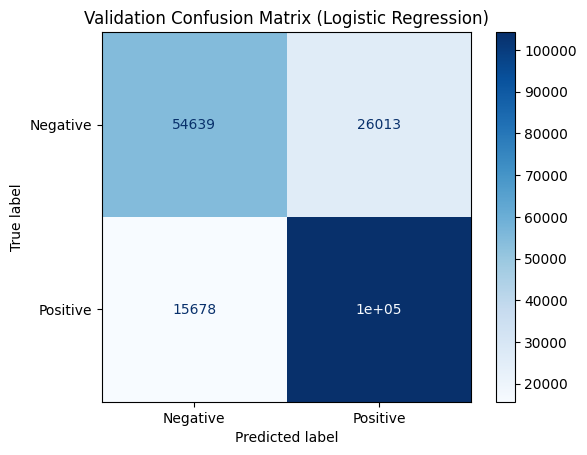

In [ ]:
# Next, we view the confusion matrix

cm = confusion_matrix(y_val, y_val_pred)
ConfusionMatrixDisplay(cm, display_labels=["Negative", "Positive"]).plot(cmap="Blues")
plt.title("Validation Confusion Matrix (Logistic Regression)")
plt.grid(False)
plt.show()

---


<div style="background-color:#e6f2ff; border-left:8px solid #0059b3; padding:20px; margin:20px 0;">
  <h2 style="color:#003366;"><strong>4.2 LSTM Model</strong></h2>
  <p style="color:#333333;">Bidirectional LSTM with pre-trained embeddings (e.g., Wrod2Vec).</p>
</div>

In [ ]:
# Step 1: Reinstall compatible keras
#!pip uninstall -y keras
#!pip install -q keras==3.8.0

### Use !pip install -r "../requirements.txt" at the beginning of the notebook instead

GPU was turned off here due to compatibility issue of the environment with CuDNN

In [ ]:
import tensorflow as tf

# Hide all GPUs at runtime (must be done before anything else in TensorFlow)
tf.config.set_visible_devices([], 'GPU')

print("After disabling:", tf.config.get_visible_devices())


After disabling: [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


In [ ]:
# loading all libraries here
import numpy as np
import pandas as pd
import gensim
from gensim.utils import simple_preprocess
from gensim.models import Word2Vec
import nltk
from nltk.tokenize import word_tokenize
import re
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout
from keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import Nadam
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import BatchNormalization
from transformers import EarlyStoppingCallback, TrainingArguments, Trainer
from sklearn.metrics import ConfusionMatrixDisplay

/courses/IE7500.202550/shared/conda_env_1/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
# we tokenize each tweet for training and testing data

training_df = train_df[['text','target']].copy()
val_df = val_df[['text','target']].copy()

# Apply gensim's tokenizer
tokenized_train = training_df['text'].dropna().astype(str).apply(simple_preprocess).tolist()
tokenized_val = val_df['text'].dropna().astype(str).apply(simple_preprocess).tolist()

In [ ]:
# first train our Word2Vec on the Tokenized Data

embedding_dim = 100

model_LSTM = Word2Vec(
    sentences=tokenized_train,
    vector_size=embedding_dim,
    window=10,
    min_count=2,
    sg=1,  # Skip-gram
    seed=42,
    workers=10
)

word2vec_model = model_LSTM.wv  # Use KeyedVectors for embedding lookup

In [ ]:
# Prepare for Keras Tokenizer

# Join tokens back into space-separated strings
#tokenized_train_texts = [' '.join(tokens) for tokens in tokenized_train]
#tokenized_val_texts = [' '.join(tokens) for tokens in tokenized_val]

# Fit tokenizer on training texts
#tokenizer = Tokenizer()
#tokenizer.fit_on_texts(tokenized_train_texts)

#word_index = tokenizer.word_index

In [ ]:
# Next, we Build the Embedding Matrix

#embedding_matrix = np.zeros((len(word_index) + 1, embedding_dim))
#found = 0

#for word, i in word_index.items():
 #   if word in word2vec_model:
  #      embedding_matrix[i] = word2vec_model[word]
   #     found += 1

#print(f"Words matched: {found}/{len(word_index)}")

#### quick debugging insights

That means ~74% of tokens in a tweet have no embeddings, the model is learning from almost nothing.

Why?
Because those tokens likely correspond to words not found in Word2Vec vocabulary. This means our embedding matrix isn't covering the actual tokens used in training.

This will cause some major issues as we train the model, in fact by several experiments, the model never actually really learned, i could not even make it overfit.
This means that likely our Word2Vec trained on clean tokens but Tokenizer worked on noisy ones (e.g., lollll, omggg)


In [ ]:
# for now, i will only limit tokenisation on trained words

# Prepare for Keras Tokenizer

# Join tokens back into space-separated strings
tokenized_train_texts = [' '.join(tokens) for tokens in tokenized_train]
tokenized_val_texts = [' '.join(tokens) for tokens in tokenized_val]

# Fit tokenizer on training texts
tokenizer = Tokenizer(num_words=82014)
tokenizer.fit_on_texts(tokenized_train_texts)

word_index = tokenizer.word_index

In [ ]:
# Next, we Build the Embedding Matrix

embedding_matrix = np.zeros((tokenizer.num_words, embedding_dim))

found = 0
for word, i in tokenizer.word_index.items():
    if i >= tokenizer.num_words:
        continue
    if word in word2vec_model:
        embedding_matrix[i] = word2vec_model[word]
        found += 1
print(f"Words matched: {found}/{tokenizer.num_words}")


Words matched: 82013/82014


In [ ]:
# Next, Convert Texts to Sequences and Pad

# Convert text to sequences
X_train_seq = tokenizer.texts_to_sequences(tokenized_train_texts)
X_val_seq = tokenizer.texts_to_sequences(tokenized_val_texts)

# Define max sequence length
max_len = max(len(seq) for seq in X_train_seq)

# Pad sequences to same length
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post')
X_val_pad = pad_sequences(X_val_seq, maxlen=max_len, padding='post')


In [ ]:
# We convert the target to float, and encode 0 and 1 to accommodate for sigmoid:

y_train = np.where(y_train == 4, 1.0, 0.0).astype(np.float32)
y_val = np.where(y_val == 4, 1.0, 0.0).astype(np.float32)


In [ ]:
# First, we reduce our model to a small Sanity Test

# Use a very small subset to test if model can overfit
X_small = X_train_pad[:100]
y_small = y_train[:100]

# Sanity check: Create a simple model
model = Sequential()
model.add(Embedding(
    input_dim=embedding_matrix.shape[0],
    output_dim=embedding_matrix.shape[1],
    weights=[embedding_matrix],
    input_length=X_small.shape[1],
    trainable=True
))
model.add(Bidirectional(LSTM(64)))
model.add(Dense(1, activation='sigmoid'))

# Compile
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# Fit to a small subset to test if it can overfit
history = model.fit(X_small, y_small, epochs=20, batch_size=10, verbose=2)

Epoch 1/20


/courses/IE7500.202550/shared/conda_env_1/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
I0000 00:00:1750847147.521196  421565 service.cc:152] XLA service 0x14e7f000d0b0 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1750847147.521239  421565 service.cc:160]   StreamExecutor device (0): Host, Default Version
2025-06-25 06:25:47.587631: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1750847148.461437  421565 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


10/10 - 4s - 361ms/step - accuracy: 0.5600 - loss: 0.6938
Epoch 2/20
10/10 - 0s - 33ms/step - accuracy: 0.6900 - loss: 0.6432
Epoch 3/20
10/10 - 0s - 33ms/step - accuracy: 0.7700 - loss: 0.5872
Epoch 4/20
10/10 - 0s - 33ms/step - accuracy: 0.7900 - loss: 0.4878
Epoch 5/20
10/10 - 0s - 33ms/step - accuracy: 0.8600 - loss: 0.3572
Epoch 6/20
10/10 - 0s - 33ms/step - accuracy: 0.9000 - loss: 0.2679
Epoch 7/20
10/10 - 0s - 33ms/step - accuracy: 0.9400 - loss: 0.1936
Epoch 8/20
10/10 - 0s - 33ms/step - accuracy: 0.9700 - loss: 0.1019
Epoch 9/20
10/10 - 0s - 33ms/step - accuracy: 0.9900 - loss: 0.0595
Epoch 10/20
10/10 - 0s - 33ms/step - accuracy: 0.9900 - loss: 0.0391
Epoch 11/20
10/10 - 0s - 33ms/step - accuracy: 0.9900 - loss: 0.0308
Epoch 12/20
10/10 - 0s - 33ms/step - accuracy: 0.9900 - loss: 0.0253
Epoch 13/20
10/10 - 0s - 33ms/step - accuracy: 0.9900 - loss: 0.0241
Epoch 14/20
10/10 - 0s - 33ms/step - accuracy: 0.9900 - loss: 0.0190
Epoch 15/20
10/10 - 0s - 33ms/step - accuracy: 0.9900

In [ ]:
# Now, we build our model

# Define model
LSTMmodel = Sequential()

# 1. Embedding layer
LSTMmodel.add(Embedding(
    input_dim=embedding_matrix.shape[0],
    output_dim=embedding_matrix.shape[1],
    weights=[embedding_matrix],
    input_length=max_len,
    trainable=False
))

# 2. First LSTM
LSTMmodel.add(Bidirectional(LSTM(265, return_sequences=True)))

LSTMmodel.add(Dropout(0.5))

# 3. Second LSTM
LSTMmodel.add(Bidirectional(LSTM(128)))

# 4. Dropout
LSTMmodel.add(Dropout(0.3))

# 5. Output
LSTMmodel.add(Dense(1, activation='sigmoid'))

# Compile
optimizer = Nadam(learning_rate=0.001)
LSTMmodel.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Show summary
LSTMmodel.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │     8,201,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_2 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,201,400 (31.29 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 8,201,400 (31.29 MB)

Epoch 1/20
1873/1873 ━━━━━━━━━━━━━━━━━━━━ 1077s 571ms/step - accuracy: 0.7712 - loss: 0.4744 - val_accuracy: 0.7955 - val_loss: 0.4364
Epoch 2/20
1873/1873 ━━━━━━━━━━━━━━━━━━━━ 1065s 568ms/step - accuracy: 0.7994 - loss: 0.4315 - val_accuracy: 0.8021 - val_loss: 0.4271
Epoch 3/20
1873/1873 ━━━━━━━━━━━━━━━━━━━━ 1062s 567ms/step - accuracy: 0.8059 - loss: 0.4210 - val_accuracy: 0.8069 - val_loss: 0.4185
Epoch 4/20
1873/1873 ━━━━━━━━━━━━━━━━━━━━ 1062s 567ms/step - accuracy: 0.8101 - loss: 0.4132 - val_accuracy: 0.8071 - val_loss: 0.4166
Epoch 5/20
1873/1873 ━━━━━━━━━━━━━━━━━━━━ 1061s 566ms/step - accuracy: 0.8145 - loss: 0.4050 - val_accuracy: 0.8099 - val_loss: 0.4131
Epoch 6/20
1873/1873 ━━━━━━━━━━━━━━━━━━━━ 1061s 566ms/step - accuracy: 0.8184 - loss: 0.3981 - val_accuracy: 0.8117 - val_loss: 0.4098
Epoch 7/20
1873/1873 ━━━━━━━━━━━━━━━━━━━━ 1061s 566ms/step - accuracy: 0.8224 - loss: 0.3910 - val_accuracy: 0.8116 - val_loss: 0.4101
Epoch 8/20
1873/1873 ━━━━━━━━━━━━━━━━━━━━ 1061s 566ms/s

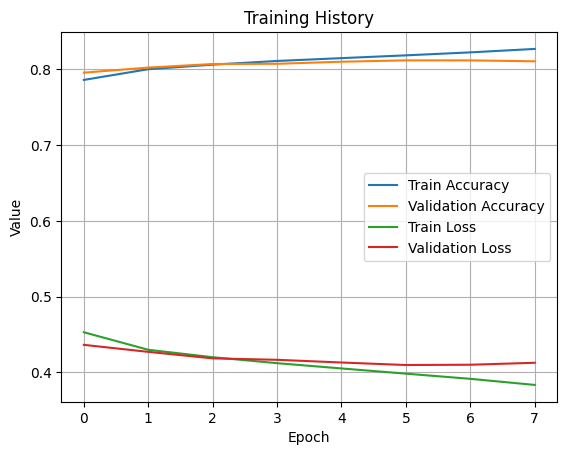

In [ ]:
# Next we train our model, and then visualize performance

early_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

history = LSTMmodel.fit(
    X_train_pad, y_train,
    validation_data=(X_val_pad, y_val),
    epochs=20,
    batch_size=500,
    callbacks=[early_stop]
)

# Save the model and download
LSTMmodel.save("sentiment_lstm_model.keras")

# Plot training history
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.title('Training History')
plt.legend()
plt.grid(True)
plt.show()

6270/6270 ━━━━━━━━━━━━━━━━━━━━ 331s 53ms/step

--- Validation Performance (LSTM) ---
Accuracy:  0.8117
Precision: 0.8151
Recall:    0.8860
F1 Score:  0.8491


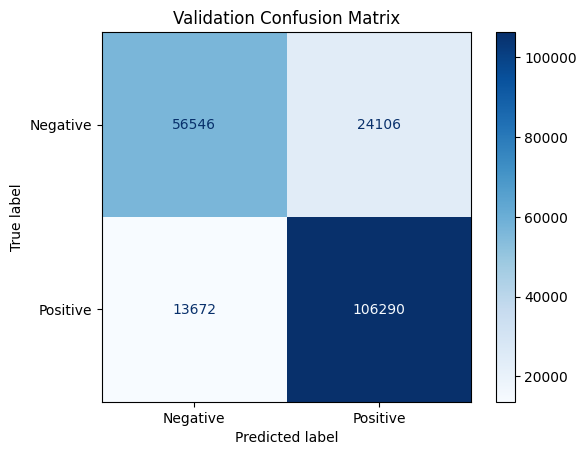

In [ ]:
# Predict probabilities using the trained LSTM model
# Since it's binary classification, the output is a single sigmoid value per instance
y_val_pred_probs = LSTMmodel.predict(X_val_pad).ravel()

# Convert predicted probabilities to class labels using a threshold of 0.5
# Values >= 0.5 are mapped to class 1 (positive), else class 0 (negative)
y_val_pred = (y_val_pred_probs >= 0.5).astype(int)

# Compute evaluation metrics
# Use zero_division=0 to handle cases where there may be no predicted positives
acc = accuracy_score(y_val, y_val_pred)
prec = precision_score(y_val, y_val_pred, zero_division=0)
rec = recall_score(y_val, y_val_pred, zero_division=0)
f1 = f1_score(y_val, y_val_pred, zero_division=0)

# Print metric results in a formatted summary
print("\n--- Validation Performance (LSTM) ---")
print(f"Accuracy:  {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall:    {rec:.4f}")
print(f"F1 Score:  {f1:.4f}")

# Generate and display the confusion matrix
cm = confusion_matrix(y_val, y_val_pred)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Negative", "Positive"]).plot(cmap="Blues")
plt.title("Validation Confusion Matrix")
plt.grid(False)
plt.show()

______________________________________________________________________________________________________________________________


<div style="background-color:#e6f2ff; border-left:8px solid #0059b3; padding:20px; margin:20px 0;">
  <h2 style="color:#003366;"><strong>4.3 BERT Model</strong></h2>
  <p style="color:#333333;">Fine-tuning DistilBERT or similar transformer model (if feasible).</p>
</div>


In [ ]:
# Install Hugging Face Transformers
!pip install transformers datasets -q

In [ ]:
!pip install --upgrade transformers

Defaulting to user installation because normal site-packages is not writeable


In [ ]:
!pip install -U accelerate

Defaulting to user installation because normal site-packages is not writeable


In [ ]:
!pip install -U transformers accelerate

Defaulting to user installation because normal site-packages is not writeable


In [ ]:
import os
os._exit(0)

In [ ]:
import sys
sys.path.insert(0, "/home/albahri.m/.local/lib/python3.12/site-packages")

In [ ]:
# Importing all libraries here

import torch
from transformers import DistilBertTokenizerFast, DistilBertForSequenceClassification
from transformers import Trainer, TrainingArguments
from datasets import Dataset
import numpy as np
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc )
from datasets import Dataset
from transformers import EarlyStoppingCallback
import os
os.environ["TOKENIZERS_PARALLELISM"] = "false"

In [ ]:
# We fix the data type

# Ensure 'target' is int and remap 4 → 1
train_df['labels'] = train_df['target'].astype(int).replace({4: 1})
val_df['labels'] = val_df['target'].astype(int).replace({4: 1})

# Ensure text is string
train_df['text'] = train_df['text'].astype(str)
val_df['text'] = val_df['text'].astype(str)

In [ ]:
# Next, we convert to Hugging Face Datasets format

train_dataset = Dataset.from_pandas(train_df[['text', 'labels']])
val_dataset = Dataset.from_pandas(val_df[['text', 'labels']])

In [ ]:
# Next, we perform tokenization with DistilBERT

# Load pretrained tokenizer
tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased')

# Tokenize datasets
def tokenize_function(tokens):
    return tokenizer(tokens["text"], truncation=True, padding="max_length", max_length=140) # this number is intentional because we already showed tweets max length

train_tokenized = train_dataset.map(tokenize_function, batched=True)
val_tokenized = val_dataset.map(tokenize_function, batched=True)

Map: 100%|██████████| 200614/200614 [00:12<00:00, 16153.99 examples/s]


In [ ]:
# Next, we load DistilBERT with classification head
BERTmodel = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=2)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# After that, we define evaluation metrics

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, predictions, average='binary')
    acc = accuracy_score(labels, predictions)
    return {"accuracy": acc, "f1": f1, "precision": precision, "recall": recall}

In [ ]:
# Next, we define training configuration

training_args = TrainingArguments(
    output_dir="./distilbert_fast_dev",   # Model output directory
    do_train=True,
    do_eval=False,                        # Skip evaluation for speed
    per_device_train_batch_size=32,       # Speed up with larger batch size
    num_train_epochs=2,
    learning_rate=1e-4,                   # Increased LR for faster convergence
    weight_decay=0.01,
    logging_steps=5000,                   # Less logging = less overhead
    save_steps=1_000_000,                 # Effectively disables mid-training saves
    save_total_limit=1,
    report_to=[]                          # Disable logging integrations
)

# Setup Trainer
BERTtrainer = Trainer(
    model=BERTmodel,
    args=training_args,
    train_dataset=train_tokenized,        # You can use a subset to test faster
    tokenizer=tokenizer
)

/tmp/ipykernel_1349124/403454765.py:18: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  BERTtrainer = Trainer(


Step,Training Loss
5000,0.455700
10000,0.455600
15000,0.454200
20000,0.444500
25000,0.444600
30000,0.434700
35000,0.414200
40000,0.406400
45000,0.400600
50000,0.396500



--- Validation Performance ---
Accuracy:  0.8149
Precision: 0.8318
Recall:    0.8654
F1 Score:  0.8483


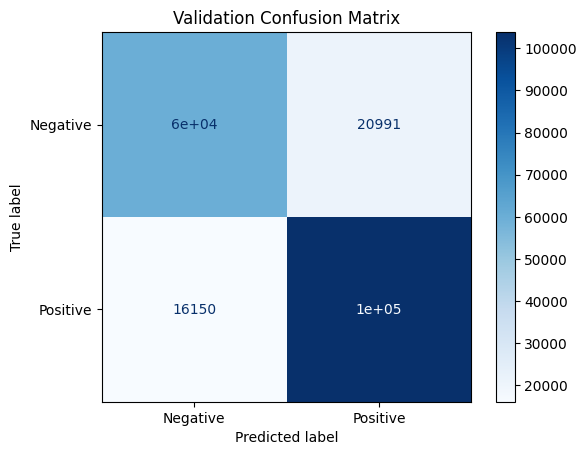

Final model weights saved to: final_distilbert_sentiment_model.pt


In [ ]:
# Now, we train our model

# 1. Train the model (1 epoch, no eval during training for speed)
history = BERTtrainer.train()

# 2. Evaluate on validation set
predictions = BERTtrainer.predict(val_tokenized)
y_true = predictions.label_ids
y_logits = predictions.predictions
y_pred = np.argmax(y_logits, axis=1)
y_probs = y_logits[:, 1]  # For ROC curve

# 3. Print validation metrics
acc = accuracy_score(y_true, y_pred)
prec = precision_score(y_true, y_pred)
rec = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print("\n--- Validation Performance ---")
print(f"Accuracy:  {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall:    {rec:.4f}")
print(f"F1 Score:  {f1:.4f}")

# 4. Confusion Matrix (only plot retained for speed)
cm = confusion_matrix(y_true, y_pred)
ConfusionMatrixDisplay(cm, display_labels=["Negative", "Positive"]).plot(cmap="Blues")
plt.title("Validation Confusion Matrix")
plt.grid(False)
plt.show()

# 5. Save final model weights only
final_model_path = "final_distilbert_sentiment_model.pt"
torch.save(BERTmodel.state_dict(), final_model_path)
print(f"Final model weights saved to: {final_model_path}")



<div style="background-color:#e6f2ff; border-left:8px solid #0059b3; padding:20px; margin:20px 0;">
  <h2 style="color:#003366;"><strong>4.4 Model Comparison and Results Analysis </strong></h2>
  <p style="color:#333333;"></p>
</div>


## Model Validation Results and Comparative Analysis for Tweet Sentiment Classification

This section presents a detailed evaluation of three models **Logistic Regression**, **LSTM**, and **BERT** trained to classify tweet sentiments as **Negative** or **Positive**. Evaluation is based on confusion matrices, performance metrics, training dynamics, and comparative strengths and weaknesses in the context of tweet sentiment analysis.

---

### 1. Logistic Regression — Validation Results

**Performance Metrics:**
- **Accuracy**: 79.22%
- **Precision**: 80.04%
- **Recall**: 86.93%
- **F1 Score**: 83.34%

**Confusion Matrix:**

|                   | **Predicted Negative** | **Predicted Positive** |
|-------------------|------------------------|-------------------------|
| **Actual Negative** | 54,639                 | 26,013                  |
| **Actual Positive** | 15,678                 | 100,000+                |

**Sentiment Analysis Insights:**
- Logistic Regression shows solid baseline performance and favors **recall**, which means it's highly sensitive to detecting **positive sentiments** in tweets.
- However, the high number of **false positives (26,013)** suggests it struggles to distinguish **genuinely negative tweets**, often misclassifying them as positive.
- This behavior may be due to:
  - Over-simplification of tweet content and lack of contextual understanding.
  - Tweets containing mixed signals (e.g., sarcasm or slang) being interpreted incorrectly.

- **Use Case Suitability**:
  - Adequate for large-scale monitoring where missing positive sentiment is riskier than mistakenly flagging negative ones (e.g., brand loyalty tracking).
  - Not ideal where negative sentiment needs precise monitoring (e.g., social crisis detection).

---

### 2. LSTM — Validation and Training Results

**Performance Metrics:**
- **Accuracy**: 81.17%
- **Precision**: 81.51%
- **Recall**: 88.60%
- **F1 Score**: 84.91%

**Confusion Matrix:**

|                   | **Predicted Negative** | **Predicted Positive** |
|-------------------|------------------------|-------------------------|
| **Actual Negative** | 56,546                 | 24,106                  |
| **Actual Positive** | 13,672                 | 106,290                 |

**Training Summary:**
- Validation accuracy and loss stabilized around epoch 6, suggesting that’s the best point to stop training.
- Model learned rapidly early on, but overfitting started appearing after epoch 6.

**Sentiment Analysis Insights:**
- The LSTM model is especially well-suited for sentiment classification on tweets due to its ability to model **sequence dependencies**.
- Tweets often contain **non-standard grammar**, **emojis**, and **elongations** (e.g., "soooo goood"), which LSTM handles more effectively than a linear model.
- Strong performance in **both recall and precision** implies it can:
  - Accurately detect **positive** sentiments.
  - Avoid incorrectly labeling **negative tweets** as positive.

- **Use Case Suitability**:
  - Ideal for real-time sentiment dashboards and public opinion tracking tools.
  - Offers a strong balance between catching enthusiastic sentiment and minimizing false optimism.

---

### 3. BERT — Validation and Training Results

**Performance Metrics:**
- **Accuracy**: 81.49%
- **Precision**: 83.18%
- **Recall**: 86.54%
- **F1 Score**: 84.83%

**Confusion Matrix:**

|                   | **Predicted Negative** | **Predicted Positive** |
|-------------------|------------------------|-------------------------|
| **Actual Negative** | ~60,000                | 20,991                  |
| **Actual Positive** | 16,150                 | 100,000+                |

**Training Summary:**
- Training loss dropped smoothly from 0.4557 → 0.3960 over 55,000 steps.
- Stable and consistent learning curve, reflecting effective pretraining and fine-tuning.

**Sentiment Analysis Insights:**
- BERT outperforms all models in **precision**, meaning it is highly accurate in identifying **positive sentiment** when it makes that prediction.
- This is crucial for tweets where subtle context (e.g., sarcasm, negation, idioms) makes sentiment ambiguous.
- The slightly lower recall (compared to LSTM) indicates BERT may miss some **less explicit** positive tweets, possibly those that use slang or non-standard formatting unseen during fine-tuning.

- **Use Case Suitability**:
  - Excellent for **automated sentiment scoring**, content moderation, or **flagging key influencer reactions**.
  - Especially beneficial when **false positives** (mistakenly labeling negativity as positivity) are more damaging (e.g., in reputation management or crisis alerts).

---

### 4. Comparative Model Analysis and Recommendations

| **Metric**          | **Logistic Regression** | **LSTM**           | **BERT**           |
|---------------------|--------------------------|--------------------|--------------------|
| Accuracy            | 79.22%                   | 81.17%             | **81.49%**         |
| Precision (Positive)| 80.04%                   | 81.51%             | **83.18%**         |
| Recall (Positive)   | 86.93%                   | **88.60%**         | 86.54%             |
| F1 Score            | 83.34%                   | **84.91%**         | 84.83%             |
| False Positives     | 26,013                   | 24,106             | **20,991**         |
| False Negatives     | 15,678                   | **13,672**         | 16,150             |

**Overall Insights:**
- **Logistic Regression** remains a decent choice for high-volume, low-compute environments, where identifying most of the **positive sentiments** is more critical than precision.
- **LSTM** is the most **balanced** model, particularly effective at picking up **positive sentiment** while minimizing false detections. Its sequential modeling helps handle emotive expressions common in tweets.
- **BERT** offers the best **precision**, indicating it’s the most confident and contextually aware when assigning **positive sentiment**, but it may miss tweets that use creative or ambiguous language.


<div style="background-color:#e6f2ff; border-left:8px solid #0059b3; padding:20px; margin:20px 0;">
  <h2 style="color:#003366;"><strong>4.5 Next Steps for Model Evaluation and Selection </strong></h2>
  <p style="color:#333333;"></p>
</div>


## Next Steps: Model Evaluation and Selection Plan

To ensure a rigorous and unbiased model selection process for tweet sentiment classification, we will follow a structured approach that distinctly separates **model selection**, **training**, and **testing** phases. This separation ensures that each decision is grounded in fair comparison and sound generalization principles.

---

### 1. **Evaluate All Models Using ROC-AUC**
- For each of the three models (Logistic Regression, LSTM, BERT), compute the **ROC-AUC score** on the validation set.
- ROC-AUC is selected because it provides a balanced view of model discrimination capability between positive and negative tweet sentiments.

---

### 2. **Perform Manual Inference Checks**
- Each model will be tested on two simple handcrafted examples:
  - **Positive Sentiment**: `"Wow this is amazing"`
  - **Negative Sentiment**: `"This is bad"`
- These checks offer qualitative insights into whether the models capture basic sentiment signals and respond logically to inputs.

---

### 3. **Select the Best Performing Model**
- The model achieving the **highest ROC-AUC** on the validation set and passing the manual inference check will be selected as the **final candidate model**.
- This process constitutes **hypothesis class selection**, where validation data is used to evaluate which model architecture generalizes best.

---

### 4. **Retrain the Final Model on Full Training + Validation Data**
- Once the best model architecture is selected, we **retrain the model from scratch** on a combined dataset consisting of both the original **training** and **validation** sets.
- This step maximizes the data available for learning while **preserving the independence of the test set**.

---

### 5. **Final Evaluation on Test Set**
- Evaluate the retrained final model on the **held-out test set**, using:
  - Accuracy
  - Precision
  - Recall
  - F1 Score
  - ROC-AUC
  - Confusion Matrix
- This test set has **never been used in training or validation**, making it a **clean estimate** of real-world generalization.

---

### Rationale: Bias Mitigation Through Proper Data Segmentation

- **Bias is mitigated** by using the **validation set for model/hypothesis selection**, and **excluding the test set** from any decision-making or parameter tuning.
- **Data leakage is avoided** because the final test set remains untouched until the very end, and no information from it influences model architecture or hyperparameters.
- This separation ensures the **final test performance is an honest estimate** of how the selected model would perform in production or on unseen tweet sentiment data.

---

*By following this plan, we preserve the scientific integrity of model evaluation, reduce selection bias, and establish a fair, reproducible framework for comparing and deploying tweet sentiment classifiers.*
